In [ ]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from wordcloud import WordCloud

In [ ]:
# Step 1: Data Collection
file_path = 'Twitter_Data.csv'
data = pd.read_csv(file_path)

In [ ]:
# Step 2: Data Exploration and Cleaning
print("First few rows of the dataset:")
print(data.head())

First few rows of the dataset:
                                          clean_text  category
0  when modi promised “minimum government maximum...      -1.0
1  talk all the nonsense and continue all the dra...       0.0
2  what did just say vote for modi  welcome bjp t...       1.0
3  asking his supporters prefix chowkidar their n...       1.0
4  answer who among these the most powerful world...       1.0


In [ ]:
# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
clean_text    4
category      7
dtype: int64


In [ ]:
# Drop rows with missing values (if any)
data.dropna(inplace=True)

In [ ]:
# Check the column names to ensure we have the correct ones
print("Column Names in Dataset:")
print(data.columns)

Column Names in Dataset:
Index(['clean_text', 'category'], dtype='object')


In [ ]:
# Explore the distribution of sentiment labels (now using 'category')
print("\nSentiment Label Distribution:")
print(data['category'].value_counts())


Sentiment Label Distribution:
category
 1.0    72249
 0.0    55211
-1.0    35509
Name: count, dtype: int64


In [ ]:
# Step 3: Feature Engineering (Text Processing)
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
X = vectorizer.fit_transform(data['clean_text'])
y = data['category']

In [ ]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Step 4: Model Training (Naive Bayes)
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [ ]:
# Step 5: Model Evaluation
y_pred = model.predict(X_test)

In [ ]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy * 100:.2f}%")


Model Accuracy: 57.02%


In [ ]:
# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

        -1.0       0.92      0.14      0.24      7152
         0.0       0.84      0.33      0.48     11067
         1.0       0.51      0.97      0.67     14375

    accuracy                           0.57     32594
   macro avg       0.76      0.48      0.46     32594
weighted avg       0.71      0.57      0.51     32594



In [ ]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[  982   305  5865]
 [   37  3669  7361]
 [   46   394 13935]]


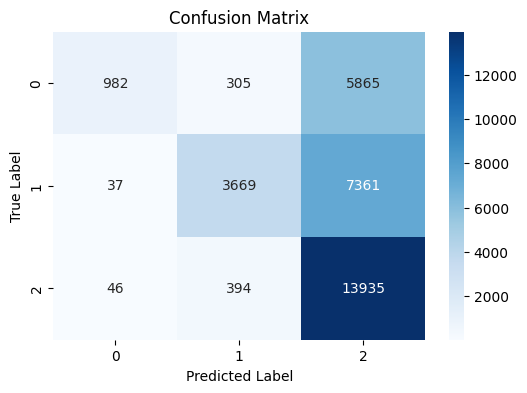

In [ ]:
# Plot the confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


Unique sentiment categories in the dataset:
[-1.  0.  1.]


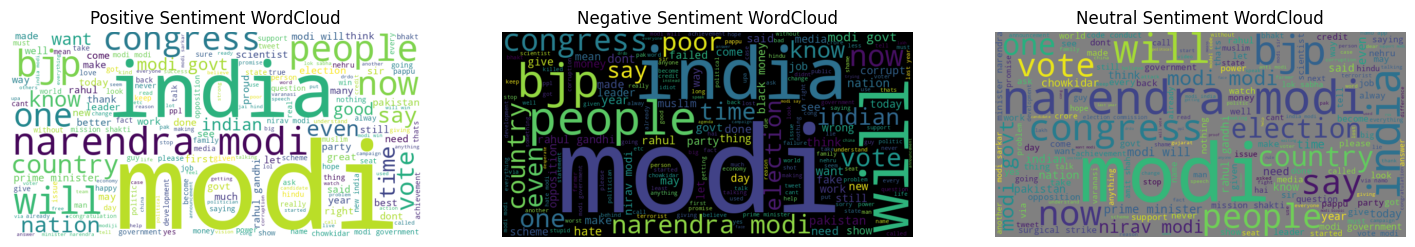

In [ ]:
# Step 6: Data Visualization

# Check the unique sentiment categories in the dataset
print("\nUnique sentiment categories in the dataset:")
print(data['category'].unique())

# WordCloud for positive (1), negative (-1), and neutral (0) sentiments

# Positive sentiment (1)
if 1 in data['category'].unique():
    positive_texts = " ".join(text for text in data[data['category'] == 1]['clean_text'])
else:
    positive_texts = ""

# Negative sentiment (-1)
if -1 in data['category'].unique():
    negative_texts = " ".join(text for text in data[data['category'] == -1]['clean_text'])
else:
    negative_texts = ""

# Neutral sentiment (0) - optional if you want to visualize neutral sentiments as well
if 0 in data['category'].unique():
    neutral_texts = " ".join(text for text in data[data['category'] == 0]['clean_text'])
else:
    neutral_texts = ""

# Generate and plot WordCloud only if we have data for the given category
plt.figure(figsize=(18, 6))

if positive_texts:
    wordcloud_pos = WordCloud(width=800, height=400, background_color='white').generate(positive_texts)
    plt.subplot(1, 3, 1)
    plt.imshow(wordcloud_pos, interpolation='bilinear')
    plt.axis('off')
    plt.title("Positive Sentiment WordCloud")
else:
    print("No 'Positive' sentiment found in the dataset for WordCloud generation.")

if negative_texts:
    wordcloud_neg = WordCloud(width=800, height=400, background_color='black').generate(negative_texts)
    plt.subplot(1, 3, 2)
    plt.imshow(wordcloud_neg, interpolation='bilinear')
    plt.axis('off')
    plt.title("Negative Sentiment WordCloud")
else:
    print("No 'Negative' sentiment found in the dataset for WordCloud generation.")

if neutral_texts:
    wordcloud_neu = WordCloud(width=800, height=400, background_color='gray').generate(neutral_texts)
    plt.subplot(1, 3, 3)
    plt.imshow(wordcloud_neu, interpolation='bilinear')
    plt.axis('off')
    plt.title("Neutral Sentiment WordCloud")
else:
    print("No 'Neutral' sentiment found in the dataset for WordCloud generation.")

plt.show()
